
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 3</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, October 23rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please make sure that **your filename includes your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1a - Stochastic Gradient Descent (25pts)

1. (5pts) **Using stochastic gradient descent, derive the coefficent updates for all 4 coefficients of the model: $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2 $$ Hint: start from the cost function (Assume sum of squared error). If you write the math by hand, include the image in your notebook.**

### Answer

The cost function for the given non-linear model is the sum of squared errors and is given by -  <br>
$SSE = (y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

To perform stochastic gradient descent, we need to update each of the coefficients simultaneously using the equations - <br>
$w_{i}^{\tau} = w_{i}^{\tau -1} - \alpha * \bigtriangledown_{w_{i}} SSE$ <br>

where $\alpha$ is the learning rate and $\bigtriangledown_{w_{i}} SSE$ is the derivative of the cost function for a given coefficient $w_i$ <br>

The derivative of the cost function with respect to each of the coefficients $w_i$ is given by - <br>

$\frac{\partial}{\partial{w_{0}}} SSE = -2*(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

$\frac{\partial}{\partial{w_{1}}} SSE = -2*x_{1}*(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

$\frac{\partial}{\partial{w_{2}}} SSE = -2*x_{1}^{2}*(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

$\frac{\partial}{\partial{w_{3}}} SSE = -2*x_{1}*x_{2}*(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

**Using these, the equations for the coefficient updates become**-

$w^{\tau}_{0} = w^{\tau - 1}_{0} + 2 *\alpha *(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

$w^{\tau}_{1} = w^{\tau - 1}_{1} + 2 *\alpha *x_{1}*(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

$w^{\tau}_{2} = w^{\tau - 1}_{2} + 2 *\alpha *x_{1}^{2}*(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>

$w^{\tau}_{3} = w^{\tau - 1}_{3} + 2 *\alpha *x_{1}*x_{2}*(y - w_{0} - w_{1}x_{1} - w_{2}x_{1}^{2} - w_{3}x_{1}x_{2})$ <br>


2. (15pts) **Write Python code for an SGD solution to the non-linear model** $$ y = w_0 + w_1x_1 + w_2x_1^2 + w_3x_1x_2$$ Try to format similarly to scikit-learn's models. Your class should take as input the learning_rate, regularization_constant and number of epochs. The fit method must take as input X,y and a choice of update_rule as 'sgd' or 'sgd_momentum' or 'rmsprop'(Notes on implementation below). The _predict_ method takes an X value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'samples.csv', for 15 epochs, using learning rates: [.0001, .001, .01, 0.1, 1, 10, 100] and regularization constants in the range: [0,10,100] . Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of learning_rate and regularization for SGD, SGD-Momentum and RMSProp. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and RMSProp (6 plots total).

# Notes on SGD with momentum
Momentum helps accelerate SGD in relevant direction and dampens the oscillations. It tries to maintain the direction in which the gradient vector was already pointing and adjusts the direction slowly with the new gradients. The steps can be listed below :
1. v[t] = mu * v[t-1] - (learning_rate)*(gradient)
2. w = w + v

Set mu = 0.90. Initialize v with zeros.


# Notes on RMSProp
RMSProp (http://ruder.io/optimizing-gradient-descent/) differs from vanilla SGD in that the learning rate of each weight changes over updates. The RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate.  In particular, it uses a moving average of squared gradients as cache. The learning_rate is divided by the cache, resulting in a different learning rate for each weight. A consequence of this update rule is that weights that have already seen large gradients (made large jumps) make smaller updates in subsequent iterations.
Specifically, the steps can be listed as below:
1. cache = (decay_rate)*(cache) + (1 - decay_rate)*(gradients^2) 
2. weights = weights - ((learning_rate)/sqrt(cache+1e-6))*gradients

Use decay_rate = 0.90. Initialize cache with zeros.

# (Optional) Notes on Training with Gradient Descent
1. Compute error: This consists of a prediction error and a regularization term. From an implementation perspective, this is a function that takes as input the truth, prediction and regularization hyperparameter and returns an error
2. Compute gradients: Take a derivative of the error in terms of the weights. This can be modelled as a function that takes as input the error and features and returns the gradients for each weight
3. Update weights: Weight updates can be done using vanilla SGD or adaptive techniques. The update function takes as inputs the gradient and hyperparameters and returns the new weights.

## Answer

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Define a class that does SGD based model fitting

In [2]:
class SGD_regression():
    """A class that implements stochastic gradient descent algorithm.
    
    Parameters-
    -------------------------------------------------------------------------
    1. learning_rate: Defines the learning rate for the stochastic gradient descent. Can be a floating point number.
    
    2. regularization_constant: Is the shrinkage factor applied while implementing a RIDGE penalty.
    
    3. n_epochs: is the number of time the function makes a pass through the data to arrive at the final coefficients
    """
    
    def __init__(self, learning_rate = 0.0001, regularization_constant = 0, n_epochs = 15):
        # set the learning rate
        self.learning_rate = learning_rate
        
        # set the regularization constant
        self.reg_constant = regularization_constant
        
        # define the number of epochs
        self.n_epochs = n_epochs
        
        # define variables to hold the coefficients
        self.coef_ = None
        
        # define a variable to hold the coefficients
        self.intercept_ = None
    
    def fit(self, X, y, update_rule = None):
        """Method that fits a stochastic gradient descent model to the data and arrives at the best coefficients
        for the parameters specified.
        
        Parameters
        ---------------------------------------------------------------------------------------------------------
        1. X - Can be an array or dataframe with the predictor values. A column with 1s is added to this to get
        the intercept values.
        
        2. y - can be a list or 1D array of output values. If a list, this is converted to a 1D array using reshape.
        
        3. update_rule: Defines the method to be used to implement stochastic gradient descent. If left 'None' then
        the algorithm assumes basic 'sgd' implementation. Other options are -
            a. sgd_momentum - applies a momentum factor to help control the pace of the convergence.
            b. rmsprop - Changes the learning rate for each of the weights using a decay rate and cache.
        """
        if update_rule is None:
            update_rule = 'sgd'
        else:
            update_rule = update_rule
        
        # convert the X to an array
        X = np.array(X, dtype = 'float64')
        y = np.array(y, dtype = 'float64')
        
        # convert a 1D array to a conformable shape
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # add a column of ones to the input data for intercept calculation
        X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X)
                     
                     
                     
                     ) # 50,4 matrix returned

        # Initialize all weights to one before we enter gradient descent. W is an array of weights.
        W = np.ones(X.shape[1]).reshape(1, -1) # returns a 1,4 matrix
        
        # intialize v for sgd_momentum
        v = np.zeros(X.shape[1]).reshape(1, -1) # returns a 1,4 matrix
        mu = 0.9

        # initialize for rmsprop
        cache = np.zeros(X.shape[1]).reshape(1, -1) # returns a 1,4 matrix
        decay_rate = 0.9
    
        # regularization_constant create a list
        self.reg_constant = np.repeat(self.reg_constant, W.shape[1]) # returns a 4, matrix
        self.reg_constant[0] = 0

        # We need to iterate over our data however many times the 'epochs' parameter mentions.
        for i in range(self.n_epochs):

            # each time for a value of epoch, we need to iterate over the entire data
            for j in range(X.shape[0]):
                
                # Considering for the moment that X is one row of the data
                x = X[j,:].reshape(-1, 1)

                # predictions
                prediction = np.matmul(W, x)

                # calculate errors with respect to y
                error = y[j] - prediction

                # gradient
                gradient = (-2 * error * x.reshape(1, -1) + 2 * self.reg_constant * W)

                if update_rule == 'sgd':
                    W = W - self.learning_rate * gradient

                elif update_rule == 'sgd_momentum':
                    v = v * mu - self.learning_rate * gradient
                    W = W + v

                else:
                    cache = decay_rate * cache + (1 - decay_rate) * gradient**2
                    W = W - (self.learning_rate/np.sqrt(cache * (10**(-6)))) * gradient

        self.coef_ = W
        
    def predict(self, X):
        """Takes in an array or dataframe and predicts the values of the outcome using the coefficients derived
        using stochastic gradient method.
        
        Parameters- 
        ---------------------------------------------------------------------------------------------------------
        1. X - an array or dataframe containing the predictor values for which predictions are to be made.
        """
        # convert the X to an array
        X = np.array(X)
        
        # convert a 1D array to a conformable shape
        if len(X.shape) == 1:
            X = X.reshape(-1,1)
        
        # add a column of ones to the input data for intercept calculation
        X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X))
        
        return np.matmul(X, self.coef_.reshape(-1,1)).reshape(1,-1)[0] # reshape into row vector and take first element

Read in the 'samples' dataset. Create columns to capture the new variables - $x_1^{2}$ and $x_1x_2$.
Break the dataframe into an array of predictors (X) and an array of responses (y).

In [3]:
# read in the sample csv file and add the new columns
samples = pd.read_csv('samples.csv', index_col = 0)

# create the new variables
samples['x1_2'] = samples['x1']**2
samples['x1_x2'] = samples['x1']*samples['x2']

# define X and y as arrays for modelling
X = np.array(samples.loc[:, ['x1', 'x1_2', 'x1_x2']], dtype = 'float64')
y = np.array(samples.loc[:, 'y'], dtype = 'float64')

Find out the best combinations of learning rate and regularization constant.

In [4]:
# initialize a dataframe to hold the coefficients and the MSE values for each update rule used.
output_df = pd.DataFrame(columns = ['update_rule', 'learning_rate', 'reg_constant', 'mse'])

# we have to fit multiple models using different values of learning rates and regularization constants.
for i in [.0001, .001, .01, 0.1, 1, 10, 100]: # learning rates
    
    for j in [0, 10, 100]: # regularization constants
        
        for rule in ['sgd', 'sgd_momentum', 'rmsprop']:
            
            sgd_model = SGD_regression(learning_rate = i, regularization_constant = j, n_epochs = 15)
            
            sgd_model.fit(X, y, update_rule = rule) # fit model
            
            prediction = sgd_model.predict(X) # predict on X
        
            mse = np.mean((prediction - y)**2) # calculate MSE
         
            output_df = output_df.append(pd.DataFrame({'update_rule' : rule,
                                                       'learning_rate': i,
                                                       'reg_constant': j,
                                                       'mse' : mse},
                                                      index = [0]))

C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in multiply
C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in multiply
C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in subtract
C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in subtract
C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: overflow encountered in add
C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: overflow encountered in multiply
C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher

Choose the best two models for each approach!

In [5]:
# for each unique value of update rule, learning rate and regularization constant, pick the best two models
choose_best = output_df.loc[:, ['update_rule', 'learning_rate', 'reg_constant', 'mse']].drop_duplicates()

choose_best = choose_best.sort_values(['update_rule', 'mse'], ascending = [True, True])

best_each_rule = choose_best.groupby('update_rule').head(1).reset_index(drop = True)

For each of the update rules, we now use the best learning rate and regularization constants to get the coefficient values and MSEs for each epoch!

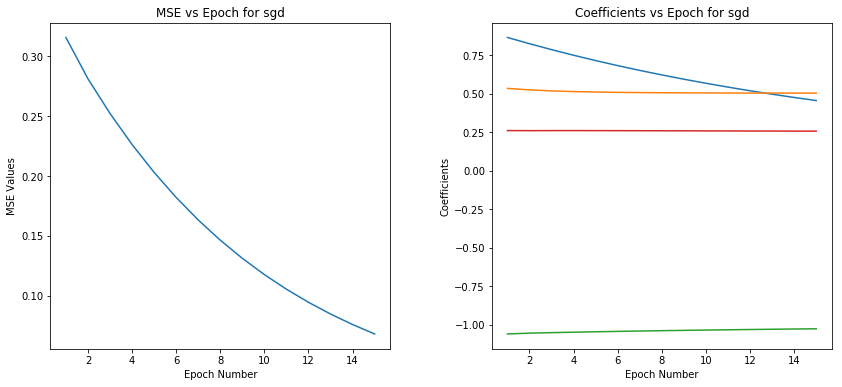

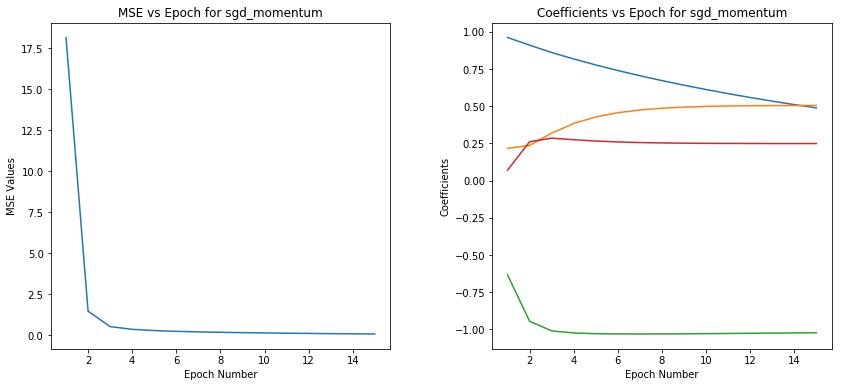

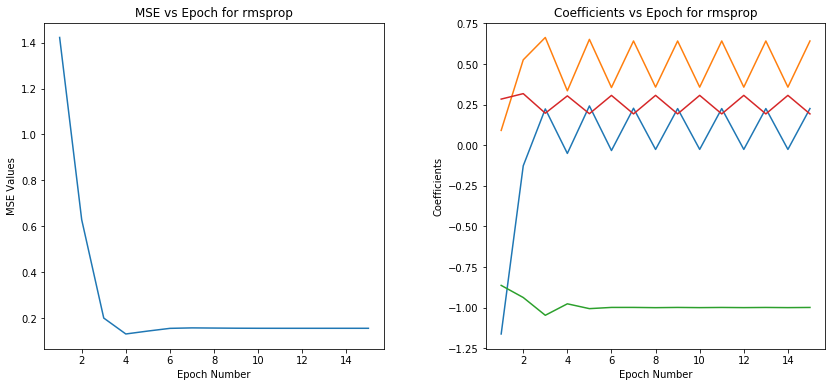

In [6]:
for rule in ['sgd', 'sgd_momentum', 'rmsprop']:
    
    # fit the model
    learning_rate = best_each_rule.loc[best_each_rule['update_rule'] == rule, 'learning_rate'].tolist()[0]
    reg_constant = best_each_rule.loc[best_each_rule['update_rule'] == rule, 'reg_constant'].tolist()[0]

    coefficients = np.empty((15, 4))
    mse = []

    for i in range(1,16):
        model = SGD_regression(learning_rate = learning_rate, regularization_constant = reg_constant, n_epochs = i)

        model.fit(X, y, update_rule = rule) # fit model

        coefficients[i-1,:] = model.coef_

        prediction = model.predict(X) # predict on X

        mse.append(np.mean((prediction - y)**2)) # calculate MSE

    # plot the values
    plt.figure(figsize = (14, 6))

    # Plot mse values
    plt.subplot(1,2,1)
    plt.plot(range(1,16), mse)
    plt.title('MSE vs Epoch for ' + rule)
    plt.xlabel('Epoch Number')
    plt.ylabel('MSE Values')

    # plot coefficient values
    plt.subplot(1,2,2)
    plt.plot(range(1,16),coefficients)
    plt.xlabel('Epoch Number')
    plt.title('Coefficients vs Epoch for ' + rule)
    plt.ylabel('Coefficients')

    plt.subplots_adjust(wspace = 0.3)

3. (2pts) Report the MSE at the end of 15 epochs for both combinations.

In [7]:
best_each_rule

,update_rule,learning_rate,reg_constant,mse
0,rmsprop,0.0001,0,0.156538
1,sgd,0.0010,0,0.067935
2,sgd_momentum,0.0001,0,0.084631


4. (3pts) Based on the experiments, which of the 3 techniques allowed for larger initial setting of the learning_rate? Why?

In [8]:
output_df.dropna(how = 'any').groupby('update_rule')['learning_rate'].max()

update_rule
rmsprop         100.00
sgd               0.01
sgd_momentum      0.01
Name: learning_rate, dtype: float64

### Answer
Dropping NaN values from the `output_df` since those correspond to situations where the error diverged, we see that the max value of learning_rate that is allowed by `rmsprop` is the highest. This is because `rmsprop` can update the learning rate of each coefficient on the fly so even if high values set that might potentially lead to divergence it corrects it back to tolerable values.

# Question 2 - Multi-layer perceptron Regressor (15 pts)

In this question, you will explore the application of Multi-layer Perceptron (MLP) regression using sklearn package in Python;
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.


We will use the OpenCL gemm kernel performance prediction dataset for this problem; https://archive.ics.uci.edu/ml/datasets/SGEMM+GPU+kernel+performance.

Following code will pre-process the data and split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 30** and **test_size = 0.25**.

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
%matplotlib inline

data = pd.read_csv('sgemm_product.csv') 
data['target'] = 0.25*(data['Run1 (ms)'] + data['Run2 (ms)']+ data['Run3 (ms)'] + data['Run4 (ms)'])
y = data['target']
y = y.as_matrix()
X = data.drop(['target','Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(181200, 14) (181200,) (60400, 14) (60400,)


C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


One more thing to use in this problem is [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y. 

1) (5pts) Use [sklearn.neural_nework.MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) to do a 5-fold cross validation using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). The cross validation must be performed on the **training data**. Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=30, learning_rate_init = 0.005
    
Now, consider the following settings for the number of hidden units:
    
   (a) *hidden_layer_sizes = (2,)* 
   
   (b) *hidden_layer_sizes = (10,)*
   
   (c) *hidden_layer_sizes = (30,)*
   
   (d) *hidden_layer_sizes = (50,)*
   
   Report the average Root Mean Squared Error (RMSE) value based on your 5-fold cross validation for each model.

#### Answer

In [40]:
# store feature names in a list
feature_names = X_train.columns.values.tolist()

X_train = np.array(X_train, dtype = 'float64')
X_test = np.array(X_test, dtype = 'float64')
y_train = np.array(y_train, dtype = 'float64')
y_test = np.array(y_test, dtype = 'float64')

In [41]:
# create partitions of the data for cross validation
from sklearn.model_selection import KFold

# initialize scaler
scaler = StandardScaler()

# store hidden layer sizes in a list.
hidden_layer_size_list = [(2,), (10,), (30,), (50,)]

# store rmse values in a list
rmse_avg = []

# fit a neural network for each split.
for size in hidden_layer_size_list:
    kfold = KFold(n_splits = 5).split(X_train)
    
    mlp_model = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate = 'constant', 
                             random_state = 42, batch_size = 30, learning_rate_init = 0.005, 
                             hidden_layer_sizes = size)
    rmse = []
    
    for train, val in kfold:
        
        X_train_scaled = scaler.fit_transform(X_train[train, :])
        X_val_scaled = scaler.transform(X_train[val, :])
        
        mlp_model.fit(X_train_scaled, y_train[train])
        predictions = mlp_model.predict(X_val_scaled)
        
        rmse_value = np.sqrt(np.mean((y_train[val] - predictions)**2))
        rmse.append(rmse_value)
        
    
    rmse_avg.append(np.mean(rmse))

print(rmse_avg)

[265.92244634708265, 222.34073117953008, 190.39245785725402, 166.13385226804812]


2) (5pts) Now, using the same parameters used in part 1), train MLPRegressor models on the entire training set and report 
the RMSE score for both the trainnig and testing sets (again, use StandardScaler). Which of the four models ((a)-(d)) performs the best? Briefly analyze and discuss the results, commenting on the number of hidden units.

#### Answer

In [42]:
# empty lists to store RMSE values
rmse_train = []
rmse_test = []

# scale the X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train on the full training data
for size in hidden_layer_size_list:
    mlp_model = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate = 'constant', 
                             random_state = 42, batch_size = 30, learning_rate_init = 0.005, 
                             hidden_layer_sizes = size)
    
    mlp_model.fit(X_train, y_train)
    train_prediction = mlp_model.predict(X_train)
    test_prediction = mlp_model.predict(X_test)
    
    rmse_train.append(np.sqrt(np.mean((y_train - train_prediction)**2)))
    rmse_test.append(np.sqrt(np.mean((y_test - test_prediction)**2)))

print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Train RMSE: [242.5485462422022, 226.89900779973956, 193.85496098475775, 183.03031872043383]
Test RMSE: [238.24746550730634, 223.2650031144957, 190.39690686186165, 180.52038249880786]


The MLP model with 50 hidden units performs the best in terms of RMSE values on the test dataset. As the number of hidden units increases, the MLP model is able to much better approximate the underlying function that generated the target values and hence the error goes down. This is in line with the theory!

3) (5pts) MLPRegressor has a built-in attribute *loss\_curve\_* which returns the loss at each epoch (misleadingly referred to as "iteration" in scikit documentation, though they use epoch in the actual code!). For example, if your model is named as *my_model* you can call it as *my\_model.loss\_curve\_* ([example](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py)). Plot three curves using below conditions (a, b, c) in one figure, where *X-axis* is epoch  number and *Y-axis* is squared root of *loss\_curve\_* valu;:

   (a) *hidden_layer_sizes = (1,)* 
   
   (b) *hidden_layer_sizes = (5,)*
   
   (c) *hidden_layer_sizes = (10,)*

#### Answer

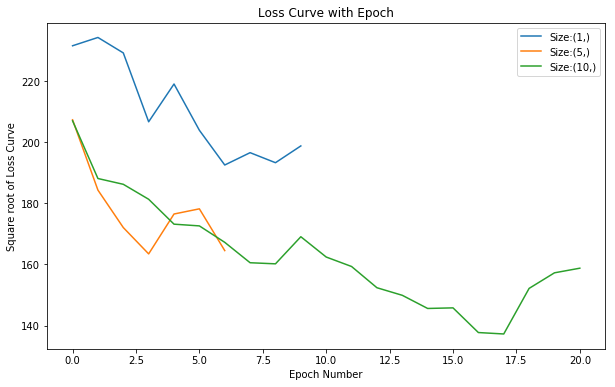

In [44]:
# hidden layer size list
hidden_layer_size_list = [(1,), (5,), (10,)]

plt.figure(figsize = (10,6))

# fit the model
for size in hidden_layer_size_list:
    mlp_model = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate = 'constant', 
                             random_state = 42, batch_size = 30, learning_rate_init = 0.005, 
                             hidden_layer_sizes = size)
    
    mlp_model.fit(X_train, y_train)
    plot_label = "Size:" + str(size)
    
    plt.plot(np.sqrt(mlp_model.loss_curve_), label = plot_label)
    plt.legend(loc = 'best')
    plt.title("Loss Curve with Epoch")
    plt.ylabel("Square root of Loss Curve")
    plt.xlabel("Epoch Number")

# Question 3 - [Kaggle Competition] Mercedes-Benz Greener Manufacturing (25 pts)

In this problem, we are going to explore a Kaggle competition: [Mercedes-Benz Greener Manufacturing](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing). Your goal is to obtain the best score you can in this competition.

The first step is to make a Kaggle account. Then find this competition and read the competition details and the description of the dataset. 

I have converted the categorical variables to numbers. The dataset is available as **'q3_train.csv'** and **'q3_test.csv'** along with the assignment. Please use this dataset for building your models. Upload your predicted values to kaggle to get the score.

Your work should meet the following requirements:

1. Data Preprocessing. 
 * Conduct some data preprocessing. (Hint: see if there is any outlier and remove them).
 * Impute the missing values (if any).
 
2. Predictive Models. 
 * You have to create three models: Lasso regression, Ridge regression and multilayer perceptron. For Lasso and Ridge regression, optimize the alphas using cross validation. Multilayer perceptron can have one hidden layer. You may try other predictive models to get better scores (optional). 
3. Get a score of 0.51 or higher on the **Private Leaderboard**. Take a screenshot of your private score after submission as proof. You can click My Submissions tab to see the history of your submissions. It will show both Public Leaderboard & Private Leaderboard score. Your highes score should be visible in the screenshot.

Briefly describe your work on each of these steps. Explain (very briefly) what approaches you tried, what worked and what did not work. Mention your team's kaggle name and include a screen shot of your public submission score. Finally, try your best to win this competition!

## Answer

**Step 1 - Read in the data and look at its shape.**

In [2]:
import pandas as pd
import numpy as np
# read in train and test data
train = pd.read_csv('q3_train.csv')
test = pd.read_csv('q3_test.csv')

print(train.shape, test.shape)

(4209, 378) (4209, 377)


**Step 2 - Which is the outcome variable?**

In [46]:
list(set(train.columns) - set(test.columns))

['y']

The column in train that is not in test is `y` and that is our outcome variable. We have 377 predictor variables in our training data. They are all anonymized so we can't make much sense of these!

**Step 3 - Separate out the predictors and the outcome** <br>
I also don't need the `ID` column as a predictor

In [4]:
X_train = train.drop(['y', 'ID'], axis = 1)
y_train = train['y']

In [48]:
print(X_train.shape)
print(y_train.shape)

(4209, 376)
(4209,)


**Step 4 - What are the column data types like?**

In [49]:
print(X_train.dtypes.value_counts())
print(test.dtypes.value_counts())

int64    376
dtype: int64
int64    377
dtype: int64


All of our variables are of the type 'integer'. The question mentions that categorical levels have been converted to numbers. These variables would need to be one-hot encoded so that they can be used in prediction.

**Step 5 - Does our data have missing values?**

In [6]:
def missing_check(df):
    # this gets a column wise sum of missing values
    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ['variable', 'missing_values']
    missing_df['Total_Rows'] = len(df)
    missing_df['Perc_Missing'] = missing_df['missing_values']*100/len(df)
    # sorts the columns in descending order of missing rows
    missing_df.sort_values('Perc_Missing', ascending = False, inplace = True)
    missing_df = missing_df.loc[missing_df['Perc_Missing']>0, :].reset_index(drop = True)
    if len(missing_df) == 0:
        return "No columns with missing values"
    else:
        return missing_df

In [51]:
print("Missing in train:", missing_check(X_train))
print("Missing in test:", missing_check(test))

Missing in train: No columns with missing values
Missing in test: No columns with missing values


We dont have any missing values in either dataset. This makes our job easier!

**Step 6 - outliers in y?** <br>
We will cap outliers using the median $\pm$ 1.5 * IQR strategy

In [7]:
# calculate iqr and get upper and lower limits
iqr = np.percentile(y_train, 75) - np.percentile(y_train, 25)

lower_limit = np.median(y_train) - 1.5* iqr
upper_limit = np.median(y_train) + 1.5* iqr

def constrain_to_limits(x):
    return np.min(np.max(x, lower_limit),upper_limit)

mask_upper = y_train >= upper_limit
mask_lower = y_train <= lower_limit

y_train[mask_upper] = upper_limit
y_train[mask_lower] = lower_limit

C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Step 8- Are there variables with just one unique value?** <br>
These do not add value to our outcome predictions, so we will remove these.

In [8]:
# check how many columns have a single unique value
X_train_column_unique_values = X_train.apply(lambda x: pd.Series.nunique(x))

# get the names of the columns to be removed
X_train_columns_remove = X_train_column_unique_values[X_train_column_unique_values == 1].index.tolist()

# drop these columns from the dataframe
X_train = X_train.drop(X_train_columns_remove, axis = 1)
X_test = test.drop(X_train_columns_remove + ['ID'], axis = 1)

print("New shape of the train dataframe:", X_train.shape)
print("New shape of the train dataframe:", X_test.shape)

New shape of the train dataframe: (4209, 364)
New shape of the train dataframe: (4209, 364)


**Step 12 - Remove Correlated variables** <br>
Next we pick out variables that are correlated to each other by a correlation of more than 0.6 and remove them!

In [54]:
correlations = X_train.corr()

In [55]:
def remove_correlated(correlation_df):
    # list of all columns
    all_columns = correlation_df.columns
    chosen_columns = []
    removed_columns = []
        
    while len(all_columns) > 0:
        
        # choose the first column in the list
        col = all_columns[0]
        
        # add it to the chosen columns list
        chosen_columns.append(col)
        
        # set criteria to filter variables
        criteria = abs(correlation_df[col]) >= 0.6
        
        # get correlated variables except for the variable itself
        correlated_columns = list(set(correlation_df.loc[criteria, col].index) - set([col]))
        
        # reduce the overall columns to check
        all_columns = list(set(all_columns) - set(correlated_columns + [col]))
        
        # add columns to be removed in removed columns
        removed_columns.append(correlated_columns)
        
        # filter out removed variable from the correlation_df
        correlations_df = correlation_df[all_columns]
    
    return chosen_columns

In [56]:
chosen_columns = remove_correlated(correlations)

**Step 9 - Align the dataframe columns** <br>
For predictions we want the columns in test and train to be the same. Let's align our dataframes next.

In [57]:
X_train_final = X_train[chosen_columns]
X_train_final, X_test_final = X_train_final.align(X_test, join = 'inner', axis = 1)

print("Shape of train data:", X_train_final.shape)
print("Shape of test data:", X_test_final.shape)

Shape of train data: (4209, 191)
Shape of test data: (4209, 191)


**Step 13 - Convert predictor dataframe and outcome dataframe to arrays**

In [58]:
# store feature names
feature_names = X_train_final.columns.tolist()

# convert to arrays
X_train_array = np.array(X_train_final)
y_train_array = np.array(y_train)
test_array = np.array(X_test_final)

from sklearn.model_selection import train_test_split
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train_array, y_train_array, test_size = 0.2, 
                                                                         random_state = 42)

print(X_train_train.shape)
print(X_train_val.shape)
print(y_train_train.shape)
print(y_train_val.shape)

(3367, 191)
(842, 191)
(3367,)
(842,)


**Step 14 - Model Building**

**Model 1 - Multiple Linear Regression with LASSO**

In [59]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# define the lasso cv model
cv_model = LassoCV(alphas = None, cv = 5, max_iter = 10000, random_state = 23)
cv_model.fit(X_train_train, y_train_train)
best_alpha = cv_model.alpha_

lasso_model = Lasso(alpha = best_alpha)
lasso_model.fit(X_train_train, y_train_train)

prediction = lasso_model.predict(X_train_val)
r_square = r2_score(y_train_val, prediction)
print(r_square)

0.6240865761364418


Looks like a trustworthy model. Let me train it on the entire train data and predict using test data.

In [60]:
# fit on entire train data
lasso_model = Lasso(alpha = best_alpha)
lasso_model.fit(X_train_array, y_train_array)

# predictions
prediction = lasso_model.predict(test_array)

Write the output to a csv for upload to Kaggle

In [61]:
output = pd.DataFrame({'ID': test['ID'],
                      'y': prediction})

output.to_csv('sub_lasso_final.csv', index = False)

**Model 2 - Linear Regression with Ridge** <br>
For this we use the entire dataset as limiting the variables did not result in improved accuracy.

In [62]:
# store feature names
feature_names = X_train.columns.tolist()

# convert to arrays
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
test_array = np.array(X_test)

from sklearn.model_selection import train_test_split
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train_array, y_train_array, test_size = 0.2,
                                                                         random_state = 42)

print(X_train_train.shape)
print(X_train_val.shape)
print(y_train_train.shape)
print(y_train_val.shape)

(3367, 364)
(842, 364)
(3367,)
(842,)


In [63]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

# define the lasso cv model
cv_model = RidgeCV(alphas = 10**np.linspace(10,-6,100)*0.5, cv = 5)
cv_model.fit(X_train_train, y_train_train)
best_alpha = cv_model.alpha_

# fit on entire training data
ridge_model = Ridge(alpha = best_alpha)
ridge_model.fit(X_train_train, y_train_train)

# get estimate on X_val
prediction = ridge_model.predict(X_train_val)
r_square = r2_score(y_train_val, prediction)
print(r_square)

0.6310564205536129


Fit using ridge on the entire data

In [64]:
# fit on entire train data
ridge_model = Ridge(alpha = best_alpha)
ridge_model.fit(X_train_array, y_train_array)

# predictions
prediction = ridge_model.predict(test_array)

Write the output to a csv for upload to Kaggle

In [65]:
output = pd.DataFrame({'ID': test['ID'],
                      'y': prediction})

output.to_csv('sub_ridge_final.csv', index = False)

We see that RIDGE underperforms on the test data as compared to LASSO. This is probably because it is giving weights to all variables which is causing it to overfit the data.

**Model 3 - MLP Perceptron**

In [66]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# hidden units = (100,), batch_size = 25, learning_rate = 0.00001, max_iter = 1000, score = 0.504

X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train_array, y_train_array, test_size = 0.2,
                                                                         random_state = 42)

mlp_model = MLPRegressor(activation = 'identity', solver = 'sgd', learning_rate = 'constant', 
                         random_state = 42, learning_rate_init = 0.00001, 
                         hidden_layer_sizes = (100,), max_iter = 1000, batch_size = 25)

mlp_model.fit(X_train_train, y_train_train)

predictions = mlp_model.predict(X_train_val)

print(r2_score(y_train_val, predictions))

0.5554866666752313


In [67]:
# fit on entire training data
mlp_model.fit(X_train_array, y_train_array)

predictions = mlp_model.predict(test_array)

output = pd.DataFrame({'ID': test['ID'],
                      'y': predictions})

output.to_csv('sub_mlp.csv', index = False)

**Model 4 : Feature encoded and modelling with XGboost**

Here instead of directly label encoding the categorical variables, we have encoded the variables based on the target variable.  
For this, the data has been directly downloaded from Kaggle with the categorical variables being intact


In [17]:
train1 = pd.read_csv('train.csv')
test1 = pd.read_csv('test.csv')

# Identifying the categorical columns
train_cols = train1.columns
train_cols_num = train1._get_numeric_data().columns
cat_cols = list(set(train_cols) - set(train_cols_num))
print(cat_cols)

['X3', 'X2', 'X0', 'X1', 'X4', 'X6', 'X5', 'X8']

**ii.Removing the outliers from the dataset**

In [19]:
def limits(k):
    upper_limit = k.mean() + 2*k.std()
    lower_limit = k.mean() - 2*k.std()
    std = k.std()
    return (lower_limit,upper_limit)

outlier_indices = []
mask = (train1['y'] < limits(train1['y'])[0]) | (train1['y'] > limits(train['y'])[1])
outlier_indices.extend(train1['y'][mask].index.values)
train_cleaned = train1.drop(train.index[list(set(outlier_indices))])
train_cleaned

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
10,31,102.09,h,r,r,f,d,f,h,p,...,0,0,0,0,0,0,0,0,0,0
11,32,98.12,al,r,e,f,d,f,h,o,...,0,0,0,0,0,0,0,0,0,0
12,34,82.62,s,b,ai,c,d,f,g,m,...,0,0,1,0,0,0,0,0,0,0


**iii.Encoding the categorical variables using the mean of the target variables**

In [22]:
# Adding train + test
train1['eval_set'] = 0; test1['eval_set'] = 1
df = pd.concat([train1, test1], axis=0, copy=True,sort = True)
# Reset index
df.reset_index(drop=True, inplace=True)

# Encoding the variables
def add_new_col(x):
    if x not in new_col.keys(): 
        # set n/2 x if is contained in test, but not in train 
        # (n is the number of unique labels in train)
        # or an alternative could be -100 (something out of range [0; n-1]
        return int(len(new_col.keys())/2)
    return new_col[x] # rank of the label

for c in cat_cols:
    # get labels and corresponding means
    new_col = train_cleaned.groupby(c).y.mean().sort_values().reset_index()
    
    # make a dictionary, where key is a label and value is the rank of that label
    new_col = new_col.reset_index().set_index(c).drop('y', axis=1)['index'].to_dict()
    
    # add new column to the dataframe
    df[c + '_new'] = df[c].apply(add_new_col)

# # drop old categorical columns
df_new = df.drop(cat_cols, axis=1)

# # show the result
df_new.head()

# Train test split
X = df.drop(list(set(cat_cols)), axis=1)

# Train
X_train = X[X.eval_set == 0]
y_train = X_train.pop('y'); 
X_train = X_train.drop(['eval_set', 'ID'], axis=1)

# Test
X_test = X[X.eval_set == 1]
X_test = X_test.drop(['y', 'eval_set', 'ID'], axis=1)

# Base score
y_mean = y_train.mean()
# Shapes

print('Shape X_train: {}\nShape X_test: {}'.format(X_train.shape, X_test.shape))

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)



Shape X_train: (4209, 376)
Shape X_test: (4209, 376)
(4209, 376)
(4209, 376)
(4209,)


**iv. Running the models**


In [24]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

xgb_params = {
    'n_trees': 100, 
    'eta': 0.005,
    'max_depth': 3,
    'subsample': 0.95,
    'colsample_bytree': 0.6,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.log(y_mean),
    'silent': 1
}

# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(X_train, np.array(np.log(y_train)))
dtest = xgb.DMatrix(X_test)

# evaluation metric
def the_metric(y_pred, y):
    y_true = y.get_label()
    return 'r2', r2_score(y_true, y_pred)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=2000, 
                   nfold = 3,
                   early_stopping_rounds=50,
                   feval=the_metric,
                   verbose_eval=1, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print('num_boost_rounds=' + str(num_boost_rounds))

# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

# Predict on trian and test
y_train_pred = np.exp(model.predict(dtrain))
y_pred = np.exp(model.predict(dtest))


[0]	train-r2:0.002099	train-rmse:0.121492	test-r2:0.000790667	test-rmse:0.121484
[1]	train-r2:0.00837	train-rmse:0.121109	test-r2:0.00704267	test-rmse:0.121103
[2]	train-r2:0.014478	train-rmse:0.120736	test-r2:0.0131493	test-rmse:0.12073
[3]	train-r2:0.0206357	train-rmse:0.120358	test-r2:0.0192923	test-rmse:0.120354
[4]	train-r2:0.026544	train-rmse:0.119994	test-r2:0.0252273	test-rmse:0.119989
[5]	train-r2:0.03258	train-rmse:0.119622	test-r2:0.031236	test-rmse:0.119619
[6]	train-r2:0.0385327	train-rmse:0.119253	test-r2:0.0371787	test-rmse:0.119251
[7]	train-r2:0.0444087	train-rmse:0.118888	test-r2:0.043036	test-rmse:0.118888
[8]	train-r2:0.0496477	train-rmse:0.118561	test-r2:0.048177	test-rmse:0.118568
[9]	train-r2:0.0552233	train-rmse:0.118213	test-r2:0.0538077	test-rmse:0.118218
[10]	train-r2:0.0609397	train-rmse:0.117855	test-r2:0.0595157	test-rmse:0.11786
[11]	train-r2:0.066597	train-rmse:0.117499	test-r2:0.0651833	test-rmse:0.117505
[12]	train-r2:0.0722113	train-rmse:0.117145	test

[104]	train-r2:0.407685	train-rmse:0.0935997	test-r2:0.404067	test-rmse:0.0938183
[105]	train-r2:0.409932	train-rmse:0.093422	test-r2:0.406284	test-rmse:0.0936437
[106]	train-r2:0.41214	train-rmse:0.093247	test-r2:0.408473	test-rmse:0.0934707
[107]	train-r2:0.414369	train-rmse:0.0930697	test-r2:0.410662	test-rmse:0.0932977
[108]	train-r2:0.416503	train-rmse:0.0929003	test-r2:0.412758	test-rmse:0.0931317
[109]	train-r2:0.418627	train-rmse:0.092731	test-r2:0.41485	test-rmse:0.092965
[110]	train-r2:0.420777	train-rmse:0.0925593	test-r2:0.416965	test-rmse:0.092797
[111]	train-r2:0.422937	train-rmse:0.0923867	test-r2:0.41909	test-rmse:0.092628
[112]	train-r2:0.42503	train-rmse:0.092219	test-r2:0.421166	test-rmse:0.0924623
[113]	train-r2:0.427136	train-rmse:0.09205	test-r2:0.423247	test-rmse:0.0922957
[114]	train-r2:0.429206	train-rmse:0.0918833	test-r2:0.425306	test-rmse:0.092131
[115]	train-r2:0.431261	train-rmse:0.0917177	test-r2:0.427327	test-rmse:0.0919687
[116]	train-r2:0.433294	train-

[206]	train-r2:0.553484	train-rmse:0.0812653	test-r2:0.546845	test-rmse:0.081808
[207]	train-r2:0.554342	train-rmse:0.0811873	test-r2:0.547659	test-rmse:0.0817337
[208]	train-r2:0.55519	train-rmse:0.0811103	test-r2:0.548481	test-rmse:0.0816597
[209]	train-r2:0.556036	train-rmse:0.0810327	test-r2:0.549294	test-rmse:0.0815863
[210]	train-r2:0.55687	train-rmse:0.0809567	test-r2:0.55009	test-rmse:0.081514
[211]	train-r2:0.557692	train-rmse:0.0808813	test-r2:0.550881	test-rmse:0.081442
[212]	train-r2:0.558501	train-rmse:0.0808077	test-r2:0.551658	test-rmse:0.0813717
[213]	train-r2:0.559276	train-rmse:0.0807367	test-r2:0.552422	test-rmse:0.0813023
[214]	train-r2:0.560069	train-rmse:0.0806637	test-r2:0.553175	test-rmse:0.0812337
[215]	train-r2:0.560829	train-rmse:0.0805943	test-r2:0.553904	test-rmse:0.0811673
[216]	train-r2:0.561624	train-rmse:0.080521	test-r2:0.554655	test-rmse:0.081099
[217]	train-r2:0.5624	train-rmse:0.0804497	test-r2:0.555391	test-rmse:0.081032
[218]	train-r2:0.563156	tra

[308]	train-r2:0.609279	train-rmse:0.0760183	test-r2:0.599407	test-rmse:0.07691
[309]	train-r2:0.609602	train-rmse:0.075987	test-r2:0.599698	test-rmse:0.076882
[310]	train-r2:0.609933	train-rmse:0.0759547	test-r2:0.600015	test-rmse:0.0768513
[311]	train-r2:0.610218	train-rmse:0.075927	test-r2:0.600282	test-rmse:0.076826
[312]	train-r2:0.610547	train-rmse:0.075895	test-r2:0.600578	test-rmse:0.0767973
[313]	train-r2:0.610875	train-rmse:0.0758627	test-r2:0.60086	test-rmse:0.07677
[314]	train-r2:0.611196	train-rmse:0.0758317	test-r2:0.60116	test-rmse:0.076741
[315]	train-r2:0.61151	train-rmse:0.0758013	test-r2:0.601449	test-rmse:0.0767133
[316]	train-r2:0.611825	train-rmse:0.07577	test-r2:0.601734	test-rmse:0.076686
[317]	train-r2:0.61212	train-rmse:0.0757413	test-r2:0.602001	test-rmse:0.07666
[318]	train-r2:0.612427	train-rmse:0.0757113	test-r2:0.602267	test-rmse:0.0766347
[319]	train-r2:0.61272	train-rmse:0.0756827	test-r2:0.602529	test-rmse:0.0766093
[320]	train-r2:0.613026	train-rmse:0

[410]	train-r2:0.631928	train-rmse:0.073782	test-r2:0.618845	test-rmse:0.0750163
[411]	train-r2:0.632083	train-rmse:0.0737663	test-r2:0.618948	test-rmse:0.075006
[412]	train-r2:0.632227	train-rmse:0.073752	test-r2:0.619061	test-rmse:0.0749947
[413]	train-r2:0.632376	train-rmse:0.073737	test-r2:0.619162	test-rmse:0.074985
[414]	train-r2:0.63253	train-rmse:0.0737217	test-r2:0.619274	test-rmse:0.0749737
[415]	train-r2:0.63267	train-rmse:0.0737073	test-r2:0.619372	test-rmse:0.0749643
[416]	train-r2:0.632812	train-rmse:0.073693	test-r2:0.619477	test-rmse:0.0749537
[417]	train-r2:0.632944	train-rmse:0.07368	test-r2:0.61956	test-rmse:0.0749457
[418]	train-r2:0.633086	train-rmse:0.0736657	test-r2:0.619671	test-rmse:0.0749347
[419]	train-r2:0.633224	train-rmse:0.0736517	test-r2:0.61979	test-rmse:0.0749233
[420]	train-r2:0.633359	train-rmse:0.073638	test-r2:0.619891	test-rmse:0.0749133
[421]	train-r2:0.633502	train-rmse:0.0736237	test-r2:0.619994	test-rmse:0.074903
[422]	train-r2:0.633637	train-

[511]	train-r2:0.643237	train-rmse:0.0726397	test-r2:0.626257	test-rmse:0.074281
[512]	train-r2:0.643317	train-rmse:0.0726317	test-r2:0.626315	test-rmse:0.0742753
[513]	train-r2:0.643403	train-rmse:0.0726227	test-r2:0.626364	test-rmse:0.0742703
[514]	train-r2:0.643487	train-rmse:0.0726143	test-r2:0.626403	test-rmse:0.0742663
[515]	train-r2:0.643568	train-rmse:0.072606	test-r2:0.626449	test-rmse:0.0742617
[516]	train-r2:0.643653	train-rmse:0.0725973	test-r2:0.626496	test-rmse:0.0742573
[517]	train-r2:0.643736	train-rmse:0.0725887	test-r2:0.626557	test-rmse:0.074251
[518]	train-r2:0.643818	train-rmse:0.0725803	test-r2:0.626605	test-rmse:0.0742463
[519]	train-r2:0.643904	train-rmse:0.0725717	test-r2:0.626644	test-rmse:0.0742427
[520]	train-r2:0.643994	train-rmse:0.0725627	test-r2:0.626683	test-rmse:0.0742387
[521]	train-r2:0.644078	train-rmse:0.072554	test-r2:0.626728	test-rmse:0.074234
[522]	train-r2:0.644151	train-rmse:0.0725467	test-r2:0.626757	test-rmse:0.0742313
[523]	train-r2:0.6442

[612]	train-r2:0.650199	train-rmse:0.0719277	test-r2:0.629359	test-rmse:0.0739717
[613]	train-r2:0.650259	train-rmse:0.0719213	test-r2:0.629378	test-rmse:0.0739693
[614]	train-r2:0.650324	train-rmse:0.0719147	test-r2:0.629387	test-rmse:0.0739687
[615]	train-r2:0.650386	train-rmse:0.0719083	test-r2:0.629391	test-rmse:0.0739687
[616]	train-r2:0.650446	train-rmse:0.0719023	test-r2:0.629413	test-rmse:0.0739663
[617]	train-r2:0.650505	train-rmse:0.071896	test-r2:0.629424	test-rmse:0.0739653
[618]	train-r2:0.650565	train-rmse:0.07189	test-r2:0.629451	test-rmse:0.0739623
[619]	train-r2:0.650619	train-rmse:0.0718847	test-r2:0.629478	test-rmse:0.0739597
[620]	train-r2:0.65067	train-rmse:0.071879	test-r2:0.629499	test-rmse:0.0739573
[621]	train-r2:0.650724	train-rmse:0.0718733	test-r2:0.629517	test-rmse:0.0739557
[622]	train-r2:0.650778	train-rmse:0.071868	test-r2:0.629541	test-rmse:0.0739533
[623]	train-r2:0.650829	train-rmse:0.071863	test-r2:0.629562	test-rmse:0.073951
[624]	train-r2:0.650879	

[713]	train-r2:0.655262	train-rmse:0.0714053	test-r2:0.630745	test-rmse:0.073833
[714]	train-r2:0.655312	train-rmse:0.0714003	test-r2:0.630757	test-rmse:0.0738317
[715]	train-r2:0.655352	train-rmse:0.071396	test-r2:0.630772	test-rmse:0.0738303
[716]	train-r2:0.655388	train-rmse:0.0713923	test-r2:0.630789	test-rmse:0.0738283
[717]	train-r2:0.655431	train-rmse:0.071388	test-r2:0.630787	test-rmse:0.0738287
[718]	train-r2:0.655476	train-rmse:0.0713833	test-r2:0.630784	test-rmse:0.073829
[719]	train-r2:0.655527	train-rmse:0.071378	test-r2:0.630786	test-rmse:0.0738287
[720]	train-r2:0.655569	train-rmse:0.0713733	test-r2:0.630792	test-rmse:0.073828
[721]	train-r2:0.655614	train-rmse:0.071369	test-r2:0.630788	test-rmse:0.0738287
[722]	train-r2:0.655658	train-rmse:0.0713643	test-r2:0.630803	test-rmse:0.073827
[723]	train-r2:0.655698	train-rmse:0.0713603	test-r2:0.630815	test-rmse:0.073826
[724]	train-r2:0.655746	train-rmse:0.0713553	test-r2:0.630824	test-rmse:0.073825
[725]	train-r2:0.655797	tr

[814]	train-r2:0.659334	train-rmse:0.0709823	test-r2:0.631163	test-rmse:0.0737913
[815]	train-r2:0.659371	train-rmse:0.070979	test-r2:0.63117	test-rmse:0.0737907
[816]	train-r2:0.659405	train-rmse:0.070975	test-r2:0.63117	test-rmse:0.0737907
[817]	train-r2:0.659456	train-rmse:0.0709693	test-r2:0.631168	test-rmse:0.0737907
[818]	train-r2:0.659485	train-rmse:0.0709667	test-r2:0.631183	test-rmse:0.0737897
[819]	train-r2:0.659541	train-rmse:0.070961	test-r2:0.631183	test-rmse:0.0737893
[820]	train-r2:0.659585	train-rmse:0.0709563	test-r2:0.631185	test-rmse:0.0737893
[821]	train-r2:0.659618	train-rmse:0.0709527	test-r2:0.631186	test-rmse:0.073789
[822]	train-r2:0.659653	train-rmse:0.070949	test-r2:0.631184	test-rmse:0.0737897
[823]	train-r2:0.659686	train-rmse:0.0709457	test-r2:0.631178	test-rmse:0.07379
[824]	train-r2:0.659738	train-rmse:0.0709403	test-r2:0.631177	test-rmse:0.0737897
[825]	train-r2:0.659771	train-rmse:0.070937	test-r2:0.631183	test-rmse:0.0737897
[826]	train-r2:0.659803	tr

[14:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[14:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[14:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[14:21:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [25]:
output = pd.DataFrame({'id': test['ID'].astype(np.int32), 'y': y_pred})
output.to_csv('sub_15_encoded.csv', index=False)

In [14]:
import pandas as pd
import numpy as np
l = [1,'a',np.nan,4]
l2 = [5,np.nan,7,8]
k = pd.DataFrame()
k['l1'] = l
k['l2'] = l2

# def combine(a,b):
#     if a == b:
#         return a
#     else:
        

0      6
1    NaN
2    NaN
3     12
dtype: object

### Summary of Modelling attempts

In the model building process, I tried the following - 
1. Capped outliers to median $\pm$ 1.5 * IQR values. This helped improve the accuracy of my models from 0.51 to 0.53.
2. I also removed variables that showed high correlations with other variables in the data using a correlation threshold of 0.6. Although this helped increase accuracy for LASSO model, it had the opposite effect on RIDGE and MLP models.
3. Considering that all categorical variables were changed to numbers before the dataset was provided for predictions, I tried to one-hot encode those variables. This however, led to no improvement in model accuracy and hence it was discarded.
4. The final accuracies I could manage with the three models were - 
    * $R^{2}= $ 0.53440 with LASSO model
    * $R^{2}= $ 0.53309 with RIDGE model
    * $R^{2}= $ 0.50493 with MLP model

![Page1](SubmissionScore.png)

# Question 4 - Bayes Decision Theory (10pts)

a. (2pts) Explain what you understand by class-conditional likelihood, class priors, and posterior probability of a class given an input, and the relationship between them. Please define all symbols and equations used explicitly.

### Answer

1. **Class conditional likelihood** - This is the probability density of the input for the given class.
2. **Class Prior** - This is the probability of observing the given class in the data. This is just the number of records of a given class as a ratio of the total number of records in the data.
3. **Posterior Probability** - This is the probability of observing a class given the input.

The relationship between posterior probability, class prior, class conditional likelihood and unconditional data likelihood is given by - <br>
$$P(C_{i}|x) = \frac{P(C_{i}) * P(x|C_{i})}{P(x_{i})}$$

where <br>

$P(C_{i}|x)$ is the posterior probability of a class given an input, <br>
$P(C_{i})$ is the class prior, <br>
$P(x|C_{i})$ is the class conditional likelihood and <br>
$P(x_{i})$ is the unconditional data likelihood.

b. (5pts) Suppose you want to learn a binary classifier to predict whether or not a customer will buy a TV. The class label is 0 if the patient does not buy and 1 if he/she does. For each customer, you are given two features, x1 is the per hour salary and x2 is the age. Assume that the class conditional distribution $p(x_1,x_2|C)$ is Gaussian. The mean salary and age of the people who do buy a TV is 40 and 27 respectively and that of those who don't is 16 and 20. Assume that both classes of customers have the same covariance given by the Identity matrix. Further, your sales data suggests that only 1 in 5 people actually bought a TV in the last few years. Mathematically derive the (optimal) Bayes decision boundary for this problem.

### Answer

At the decision boundary- <br>
$P(C_{1}|x_{1},x_{2}) = P(C_{2}|x_{1},x_{2})$ <br>

or <br>

$ln(P(x_{1},x_{2}|C_{1})) + ln(P(C_{1})) = ln(P(x_{1},x_{2}|C_{2})) + ln(P(C_{2}))$ <br>

$\frac{-1}{2}*[(x_{1} - 40)^{2}*(x_{2} - 27)^{2}] + ln(0.2) = \frac{-1}{2}*[(x_{1} - 16)^{2} + (x_{2} - 20)^{2}] + ln(0.8)$ <br>

$\frac{-1}{2}*((x_{1} - 16 + x_{1} - 40)*(x_{1} - 16 - x_{1} + 40) + (x_{2} - 20 + x_{2} - 27)*(x_{2} - 20 - x_{2} + 27)) = 1.3864$ <br>

$(48x_{1} - 1344 + 14x_{2} - 329) = 2.7728$ <br>

$24x_{1} + 7x_{2} = 837.88$ <br>


**The decision boundary for salary is as per the equation given above.** <br>

c. (3pts) Write a script to sample 100 customers from each class (C = 0; 1) under the assumed distribution and the estimated parameters and plot their features. Plot the decision boundary you obtained in the part (b) on the same plot.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# data for class 1
mean_1 = [40, 27]
cov = [[1,0],[0,1]]
class_1_data = np.random.multivariate_normal(mean_1, cov, 100)

# data for class 0
mean_0 = [16, 20]
cov = [[1,0],[0,1]]


class_0_data = np.random.multivariate_normal(mean_0, cov, 100)

class_1_data


# plt.scatter(class_1_data[:,0], class_1_data[:,1], color = 'blue', label = "Class 1")
# plt.scatter(class_0_data[:,0], class_0_data[:,1], color = 'red', label = "Class 0")
# plt.xlabel('Salary', fontsize = 12)
# plt.ylabel('Age', fontsize = 12)
# plt.legend(loc = 'best')

# x2 = np.array(list(range(14,40,1)))
# x1 = (837.886 - 7*x2)/24.0
# plt.plot(x1, x2, color = 'black')
# plt.title('Boundary between Salary and Age', fontsize = 15)

array([[40.88673637, 27.67938098],
       [41.3518801 , 27.12875968],
       [38.70867824, 26.82049951],
       [39.25703378, 28.13644245],
       [38.84206301, 25.08144135],
       [37.98932174, 26.95054254],
       [40.29851699, 25.39877262],
       [38.61559867, 26.45833906],
       [38.96140202, 27.17232657],
       [40.63963274, 26.65416486],
       [39.16724233, 28.51308187],
       [39.35570034, 26.28129269],
       [40.33819833, 28.07224115],
       [39.58032353, 26.77650748],
       [41.11360763, 27.61164724],
       [39.14101362, 25.43146033],
       [39.55273806, 26.60894496],
       [39.99876705, 26.76126133],
       [39.50732713, 26.72551553],
       [40.95521895, 28.1446317 ],
       [40.44718635, 28.40096328],
       [40.38094101, 28.2835147 ],
       [39.99124196, 28.11693782],
       [39.55837814, 26.35979464],
       [41.56727954, 26.55876467],
       [40.50438443, 27.38055828],
       [40.88971738, 27.38197913],
       [40.46363759, 27.38943571],
       [39.06365255,